In [1]:
!unzip "/content/drive/MyDrive/car_dataset.zip" -d "/content/drive/My Drive/"

Archive:  /content/drive/MyDrive/car_dataset.zip
  inflating: /content/drive/My Drive/data1a/training/00-damage/0001.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0002.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0003.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0004.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0005.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0006.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0007.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0008.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0009.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0010.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0011.JPEG  
  inflating: /content/drive/My Drive/data1a/training/00-damage/0012.JPEG  
  inflating: /content/drive/My Drive/data1a/trainin

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [4]:
train_path = '/content/drive/MyDrive/car_dataset/training'
val_path = '/content/drive/MyDrive/car_dataset/validation'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [23]:
#the preprocessig funviotn that is going to apply some preprocesing on the image before passing it to the model,
#we are processing them in the same format as the VGG16 model takes in data
# train_batches = train_datagen.flow_from_directory(directory=train_path,target_size=(256,256),classes=['damage','whole'],batch_size=32)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=['damage','whole'],batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path,target_size=(224,224),classes=['damage','whole'],batch_size=32)


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [24]:
imgs,labels = next(train_batches)

In [25]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

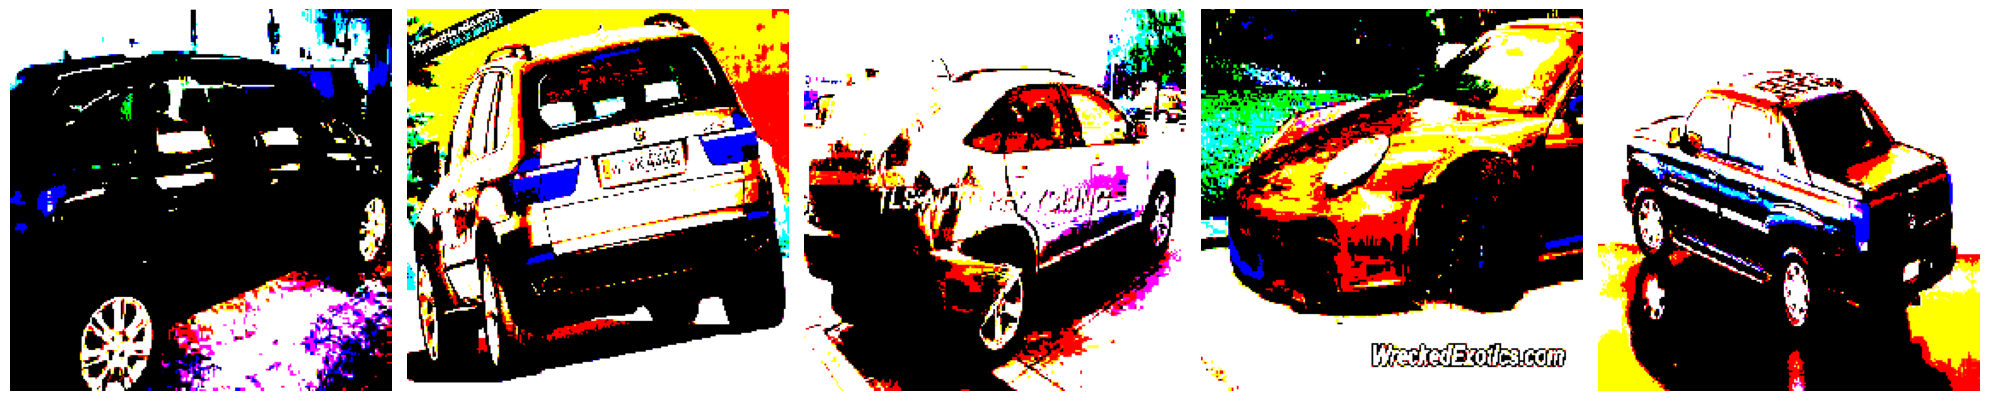

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [26]:
plotImages(imgs)
print(labels)

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(train_batches, validation_data=valid_batches,epochs=30,verbose=2)

Epoch 1/30
58/58 - 275s - loss: 0.5592 - accuracy: 0.8370 - val_loss: 0.1925 - val_accuracy: 0.9326 - 275s/epoch - 5s/step
Epoch 2/30
58/58 - 18s - loss: 0.1763 - accuracy: 0.9299 - val_loss: 0.2143 - val_accuracy: 0.9130 - 18s/epoch - 303ms/step
Epoch 3/30
58/58 - 18s - loss: 0.1361 - accuracy: 0.9402 - val_loss: 0.1714 - val_accuracy: 0.9283 - 18s/epoch - 304ms/step
Epoch 4/30
58/58 - 17s - loss: 0.0972 - accuracy: 0.9636 - val_loss: 0.2011 - val_accuracy: 0.9217 - 17s/epoch - 287ms/step
Epoch 5/30
58/58 - 17s - loss: 0.0829 - accuracy: 0.9701 - val_loss: 0.1597 - val_accuracy: 0.9391 - 17s/epoch - 288ms/step
Epoch 6/30
58/58 - 19s - loss: 0.0476 - accuracy: 0.9842 - val_loss: 0.1757 - val_accuracy: 0.9370 - 19s/epoch - 324ms/step
Epoch 7/30
58/58 - 17s - loss: 0.0235 - accuracy: 0.9973 - val_loss: 0.1990 - val_accuracy: 0.9348 - 17s/epoch - 289ms/step
Epoch 8/30
58/58 - 19s - loss: 0.0137 - accuracy: 0.9995 - val_loss: 0.1785 - val_accuracy: 0.9391 - 19s/epoch - 326ms/step
Epoch 9/3

In [36]:
model.save('/content/resnet.h5')